## VK API

API -- an application programming interface, an interface or communication protocol between a client and a server intended to simplify the building of client-side software. The client makes a request in a specific format, they get a response in a specific format or initiate a defined action.

Twitter, VK, YouTube etc. have APIs -- great for us, since we, as linguists, are interested in the live data. Today we will study the VK API.

* The VK API documentation: https://vk.com/dev/openapi

* VK API was originally developed so that different web-applications can interact with VK, we will be using it for downloading the data

* vk.com has special pages that handle automatic requests

* Remember how we were downloading stuff from the Internet?

In [19]:
import urllib.request  # importing the module
req = urllib.request.Request('https://habrahabr.ru/') # sending a request
with urllib.request.urlopen(req) as response: # opening a connection with the web-page
   html = response.read().decode('utf-8') # reading the response into the html variable
print(html[:210])

<!DOCTYPE html>
<html lang="ru" class="no-js">
  <head>
    <meta http-equiv="content-type" content="text/html; charset=utf-8" />
<meta content='width=1024' name='viewport'>
<title>–õ—É—á—à–∏–µ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –∑–∞ —Å—É—Ç–∫–∏ / 


* To interact with vk.com, we will be using the same module -- urllib.request, the pages that we will be sending our requests to are described in the documentation of the VK API.

* In our requests we will have to specify certain parameters.

* First, we specify the page: https://api.vk.com/method/wall.get 

* Then, after a `?`, we include the parameters (key=value pairs).

* For example, https://api.vk.com/method/wall.get?owner_id=1 -- here the `owner_id` parameter is set to `1` -- the id of the user we are interested in -- https://vk.com/id1

* To join multiple parameters, use the `&`: https://api.vk.com/method/wall.get?owner_id=1&count=10 -- here the `count` parameter is set to `10` which means that we want to download 10 posts from the owner's wall.

* You will also need an access token. You can get it [here](https://vk.com/login?u=2&to=YXBwcz9hY3Q9bWFuYWdl).

* The version of the API -- the `v` parameter -- https://vk.com/dev/versions -- e.g., `v=5.92`

* Let's play with the VK API. First, let's download 20 posts from the Durov's wall using the `wall.get` method (the list of all the methods -- https://vk.com/dev/methods):

In [20]:
import urllib.request 
req = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=1&count=20&v=5.92&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8') 
response = urllib.request.urlopen(req) 
result = response.read().decode('utf-8')

In [21]:
print(result)

{"response":{"count":283,"items":[{"id":2442097,"from_id":1,"owner_id":1,"date":1525805964,"post_type":"post","text":"–ò–Ω–æ–≥–¥–∞ –≥–æ–≤–æ—Ä—è—Ç, —á—Ç–æ Telegram –±—ã–ª –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω –≤ –†–æ—Å—Å–∏–∏, —Ç–∞–∫ –∫–∞–∫ ‚Äú–∑–∞–∫–æ–Ω –µ—Å—Ç—å –∑–∞–∫–æ–Ω‚Äù. –û–¥–Ω–∞–∫–æ Telegram –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω –≤ –†–æ—Å—Å–∏–∏ –∫–∞–∫ —Ä–∞–∑ –≤–æ–ø—Ä–µ–∫–∏ –≥–ª–∞–≤–Ω–æ–º—É –∑–∞–∫–æ–Ω—É —Å—Ç—Ä–∞–Ω—ã ‚Äì –ö–æ–Ω—Å—Ç–∏—Ç—É—Ü–∏–∏. –†–µ—à–µ–Ω–∏—è —Å—É–¥–æ–≤ –∏ –∑–∞–∫–æ–Ω—ã, –ø—Ä–æ—Ç–∏–≤–æ—Ä–µ—á–∞—â–∏–µ –ö–æ–Ω—Å—Ç–∏—Ç—É—Ü–∏–∏, –Ω–µ –∏–º–µ—é—Ç —Å–∏–ª—ã. –ê —ç—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –∏ —Å–∞–º–∞ –±–ª–æ–∫–∏—Ä–æ–≤–∫–∞ Telegram –Ω–µ–∑–∞–∫–æ–Ω–Ω–∞. \n\n–ï—Å–ª–∏ –±—ã –§–°–ë –æ–≥—Ä–∞–Ω–∏—á–∏–ª–∞—Å—å –∑–∞–ø—Ä–æ—Å–æ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Ç–µ—Ä—Ä–æ—Ä–∏—Å—Ç–∞—Ö, —Ç–æ –µ–µ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–µ –≤–ø–∏—Å—ã–≤–∞–ª–æ—Å—å –±—ã –≤ —Ä–∞–º–∫–∏ –ö–æ–Ω—Å—Ç–∏—Ç—É—Ü–∏–∏. –û–¥–Ω–∞–∫–æ —Ä–µ—á—å –∏–¥–µ—Ç –æ –ø–µ—Ä–µ–¥–∞—á–µ —É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã—Ö –∫–ª—é—á–µ–π —à–∏—Ñ—Ä–æ–≤–∞–Ω–∏—è —Å —Ü–µ–ª—å—é

Looks like a python dictionary with the key -- response. Is that so?

In [22]:
type(result)

str

In [13]:
import json
data = json.loads(result) 
print(type(data))

<class 'dict'>


* Let's study the structure of the dictionary and extract the posts:

In [14]:
data['response']['items']

[{'id': 2442097,
  'from_id': 1,
  'owner_id': 1,
  'date': 1525805964,
  'post_type': 'post',
  'text': '–ò–Ω–æ–≥–¥–∞ –≥–æ–≤–æ—Ä—è—Ç, —á—Ç–æ Telegram –±—ã–ª –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω –≤ –†–æ—Å—Å–∏–∏, —Ç–∞–∫ –∫–∞–∫ ‚Äú–∑–∞–∫–æ–Ω –µ—Å—Ç—å –∑–∞–∫–æ–Ω‚Äù. –û–¥–Ω–∞–∫–æ Telegram –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω –≤ –†–æ—Å—Å–∏–∏ –∫–∞–∫ —Ä–∞–∑ –≤–æ–ø—Ä–µ–∫–∏ –≥–ª–∞–≤–Ω–æ–º—É –∑–∞–∫–æ–Ω—É —Å—Ç—Ä–∞–Ω—ã ‚Äì –ö–æ–Ω—Å—Ç–∏—Ç—É—Ü–∏–∏. –†–µ—à–µ–Ω–∏—è —Å—É–¥–æ–≤ –∏ –∑–∞–∫–æ–Ω—ã, –ø—Ä–æ—Ç–∏–≤–æ—Ä–µ—á–∞—â–∏–µ –ö–æ–Ω—Å—Ç–∏—Ç—É—Ü–∏–∏, –Ω–µ –∏–º–µ—é—Ç —Å–∏–ª—ã. –ê —ç—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –∏ —Å–∞–º–∞ –±–ª–æ–∫–∏—Ä–æ–≤–∫–∞ Telegram –Ω–µ–∑–∞–∫–æ–Ω–Ω–∞. \n\n–ï—Å–ª–∏ –±—ã –§–°–ë –æ–≥—Ä–∞–Ω–∏—á–∏–ª–∞—Å—å –∑–∞–ø—Ä–æ—Å–æ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Ç–µ—Ä—Ä–æ—Ä–∏—Å—Ç–∞—Ö, —Ç–æ –µ–µ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–µ –≤–ø–∏—Å—ã–≤–∞–ª–æ—Å—å –±—ã –≤ —Ä–∞–º–∫–∏ –ö–æ–Ω—Å—Ç–∏—Ç—É—Ü–∏–∏. –û–¥–Ω–∞–∫–æ —Ä–µ—á—å –∏–¥–µ—Ç –æ –ø–µ—Ä–µ–¥–∞—á–µ —É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã—Ö –∫–ª—é—á–µ–π —à–∏—Ñ—Ä–æ–≤–∞–Ω–∏—è —Å —Ü–µ–ª—å—é –ø–æ—Å–ª–µ–

* Now let's extract the text from the first post:

In [15]:
data['response']['items'][0]['text']

'–ò–Ω–æ–≥–¥–∞ –≥–æ–≤–æ—Ä—è—Ç, —á—Ç–æ Telegram –±—ã–ª –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω –≤ –†–æ—Å—Å–∏–∏, —Ç–∞–∫ –∫–∞–∫ ‚Äú–∑–∞–∫–æ–Ω –µ—Å—Ç—å –∑–∞–∫–æ–Ω‚Äù. –û–¥–Ω–∞–∫–æ Telegram –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω –≤ –†–æ—Å—Å–∏–∏ –∫–∞–∫ —Ä–∞–∑ –≤–æ–ø—Ä–µ–∫–∏ –≥–ª–∞–≤–Ω–æ–º—É –∑–∞–∫–æ–Ω—É —Å—Ç—Ä–∞–Ω—ã ‚Äì –ö–æ–Ω—Å—Ç–∏—Ç—É—Ü–∏–∏. –†–µ—à–µ–Ω–∏—è —Å—É–¥–æ–≤ –∏ –∑–∞–∫–æ–Ω—ã, –ø—Ä–æ—Ç–∏–≤–æ—Ä–µ—á–∞—â–∏–µ –ö–æ–Ω—Å—Ç–∏—Ç—É—Ü–∏–∏, –Ω–µ –∏–º–µ—é—Ç —Å–∏–ª—ã. –ê —ç—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –∏ —Å–∞–º–∞ –±–ª–æ–∫–∏—Ä–æ–≤–∫–∞ Telegram –Ω–µ–∑–∞–∫–æ–Ω–Ω–∞. \n\n–ï—Å–ª–∏ –±—ã –§–°–ë –æ–≥—Ä–∞–Ω–∏—á–∏–ª–∞—Å—å –∑–∞–ø—Ä–æ—Å–æ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Ç–µ—Ä—Ä–æ—Ä–∏—Å—Ç–∞—Ö, —Ç–æ –µ–µ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–µ –≤–ø–∏—Å—ã–≤–∞–ª–æ—Å—å –±—ã –≤ —Ä–∞–º–∫–∏ –ö–æ–Ω—Å—Ç–∏—Ç—É—Ü–∏–∏. –û–¥–Ω–∞–∫–æ —Ä–µ—á—å –∏–¥–µ—Ç –æ –ø–µ—Ä–µ–¥–∞—á–µ —É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã—Ö –∫–ª—é—á–µ–π —à–∏—Ñ—Ä–æ–≤–∞–Ω–∏—è —Å —Ü–µ–ª—å—é –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –±–µ—Å–∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–≥–æ –¥–æ—Å—Ç—É–ø–∞ –∫ –ø–µ—Ä–µ–ø–∏—Å–∫–µ –Ω–µ–æ–≥—Ä–∞–Ω–∏—á–µ–Ω–

* Now, how do we extract the original text from a repost?

In [16]:
data['response']['items'][18]['copy_history'][0]['text']


'–°–µ–≥–æ–¥–Ω—è –í–ö–æ–Ω—Ç–∞–∫—Ç–µ –∑–∞–ø—É—Å—Ç–∏–ª –Ω–∞–±–æ—Ä ¬´Election girl¬ª, –ø–æ–ª–Ω–æ—Å—Ç—å—é —Å—Ä–∏—Å–æ–≤–∞–≤ —Å—Ç–∏–∫–µ—Ä—ã —Å –º–æ–∏—Ö. –ü–æ–ª—É—á–∏–ª–æ—Å—å, –ø—Ä–∞–≤–¥–∞, –Ω–µ –æ—á–µ–Ω—å, –Ω–æ –Ω–µ –æ—Ç—á–∞–∏–≤–∞–π—Å—è, –¥–æ—Ä–æ–≥–æ–π –∞–≤—Ç–æ—Ä! –ü–∞—Ä—É –ª–µ—Ç —Å—Ä–∏—Å–æ–≤–∫–∏ –º–æ–∏—Ö —Å—Ç–∏–∫–µ—Ä–æ–≤ –∏ —Ç—ã —Å—Ç–∞–Ω–µ—à—å –¥–∞–∂–µ –≤–ø–æ–ª–Ω–µ —Å–µ–±–µ –Ω–∏—á–µ–≥–æ - —É –º–µ–Ω—è –∏—Ö –æ—á–µ–Ω—å –º–Ω–æ–≥–æ. üòå\n\n–•–æ—á–µ—à—å –ø–æ-–≤–∑—Ä–æ—Å–ª–æ–º—É? –†–∞–±–æ—Ç–∞–π —Å–∞–º, –∞ –Ω–µ —Å–∏–¥–∏ –Ω–∞ —á—É–∂–æ–π —à–µ–µ, –∫–∞–∫ –ø–∏—è–≤–∫–∞. –ü–æ –∏—Ä–æ–Ω–∏–∏ —Å—É–¥—å–±—ã —ç—Ç–æ—Ç –Ω–∞–±–æ—Ä –ø–æ—Å–≤—è—â–µ–Ω –≤—ã–±–æ—Ä–∞–º –∏ –ø—Ä–∏–∑—ã–≤–∞–µ—Ç –ø–æ–≤–∑—Ä–æ—Å–ª–µ—Ç—å. \n\n–û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä —Ç—É—Ç: t.me/addstickers/pinup_girl\nüíï'

* Sometimes we would want to extract the time of the post:

In [23]:
from datetime import datetime

unixtime = data['response']['items'][1]['date'] # extracting the time info
utc = datetime.fromtimestamp(unixtime) # converting unixtime into utc
print(utc)

2018-05-03 16:05:53


* Let's draw a wordcloud based on the text of the second post:

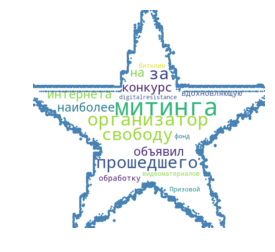

In [31]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = data['response']['items'][1]['text']

comment_mask = np.array(Image.open("C:\!!_info_!!\Desktop\Free_Blue_Star.jpg"))

stopwords = set(STOPWORDS)
stopwords.add("–°–≤–µ—Ç–æ–≤")
stopwords.add("–ú–∏—Ö–∞–∏–ª")

cloud = WordCloud(background_color="white", max_words=2000, mask=comment_mask, stopwords=stopwords, contour_width=5, contour_color='steelblue')

cloud.generate(text)

plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

cloud.to_file("post_cloud.png")
# the real size of the picture
#Image.open("post_cloud.png")

* Can we download the comments? Yes, here is the method -- https://vk.com/dev/wall.getComments
* To get the post_id, click on the date of the post, you will see something like https://vk.com/id1?w=wall1_2442097 -- copy the final number from the link, in this case, 2442097

In [29]:
import urllib.request  
req = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=1&post_id=2442097&count=2&need_likes=1&v=5.92&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8') 
response = urllib.request.urlopen(req) 
comments = response.read().decode('utf-8')

In [30]:
print(comments)

{"response":{"count":388173,"items":[{"id":2442098,"parents_stack":[],"date":1525805968,"thread":{"count":170,"items":[],"can_post":true,"show_reply_button":true,"groups_can_post":true},"deleted":true},{"id":2442100,"from_id":243752050,"post_id":2442097,"owner_id":1,"parents_stack":[],"date":1525805970,"text":"–ù—É —á–æ –ø–∞—Å–∞–Ω—ã,—Ü–∏—Ñ—Ä–æ–≤–æ–µ —Å–æ–ø—Ä–æ—Ç–∏–≤–ª–µ–Ω–∏–µ\nUPD:–ì–æ 1–ö –ª–∞–π–∫–æ–≤? :D\nUPDD:–ß—É–≤–∞–∫ —Å–≤–µ—Ä—Ö—É —Å–ø–∏–∑–¥–∏–ª —Å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∫–∏.–∫—Ä—ã—Å–∞!!!","likes":{"count":3838,"user_likes":0,"can_like":1},"attachments":[{"type":"photo","photo":{"id":456244482,"album_id":-5,"owner_id":243752050,"sizes":[{"type":"m","url":"https:\/\/sun9-47.userapi.com\/c850632\/v850632550\/9685d\/LbqEM027b5A.jpg","width":119,"height":130},{"type":"o","url":"https:\/\/sun9-51.userapi.com\/c850632\/v850632550\/96861\/wapqg-NHEdE.jpg","width":130,"height":142},{"type":"p","url":"https:\/\/sun9-55.userapi.com\/c850632\/v850632550\/96862\/VnAlnZcwMgc.jpg","width":200,"height